# Pymaceuticals Inc.
---

### Analysis

- For the Pymaceuticals assignment, I was able to come up with three observations.
  
- For starters, The data suggests that the Capomulin treatment shows a significant reduction in tumor volume over time compared to other drug regimens, especially when compared to placebo or drugs like Infubinol. This indicates that Capomulin may in some cases be more effective in reducing tumor size in the mice that were being tested.

- Secondly, the survival rate for mice treated with Capomulin remains higher over time compared to those treated with other drug regimens. This serves as an indicator that not only does Capomulin help reduce tumor volume, but it also improves the overall survival rate of the mice.

- Lastly, showing the correlation between mouse weight and tumor size. Showing a positive correlation between the weight of the mice and the size of the tumors. Mice who weighed more, appeared to have larger tumor volumes, suggesting that weight might be a key factor in determining if it influences the efficiency of the drug and if its linked to how big the tumor grows. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import linregress
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
#df1.merge(df2, how='inner', on='a')

data_df= mouse_metadata.merge(study_results, how='inner', on='Mouse ID')

# Display the data table for preview
data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
data_df["Mouse ID"].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = data_df[["Mouse ID", "Timepoint"]].duplicated()
data_df[duplicates]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID.
data_df[data_df["Mouse ID"]== "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data_df.drop_duplicates(subset=['Mouse ID'])


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
data_df["Mouse ID"].nunique()

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Sample data creation (replace this with your actual DataFrame)
summary_stats = data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    mean='mean',
    median='median',
    variance='var',
    std_dev='std',
    sem='sem'
)

# Display the summary statistics
summary_stats

                                                                      

    
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.


,mean,median,variance,std_dev,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_df = data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
     Mean="mean",
    Median="median",
    Variance=lambda x: np.std(x, ddof=0),
    Standard_Deviation="std",
    SEM=st.sem 
)

    


# Using the aggregation method, produce the same summary statistics in a single line
summary_df

,Mean,Median,Variance,Standard_Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.983904,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.250556,6.268188,0.469821
Infubinol,52.884795,51.820584,6.548770,6.567243,0.492236
Ketapril,55.235638,53.698743,8.257659,8.279709,0.603860
Naftisol,54.331565,52.509285,8.112811,8.134708,0.596466
Placebo,54.033581,52.288934,7.799368,7.821003,0.581331
Propriva,52.322552,50.854632,6.487528,6.507770,0.512884
Ramicane,40.216745,40.673236,4.835669,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.689090,7.710419,0.573111


## Bar and Pie Charts

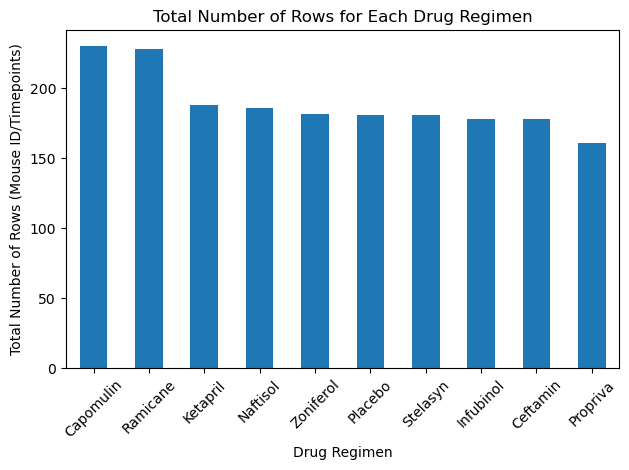

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
import pandas as pd
import matplotlib.pyplot as plt

counts = data_df["Drug Regimen"].value_counts()
counts.plot(kind="bar")





# Step 4: Customize the chart
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Rows (Mouse ID/Timepoints)')
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xticks(rotation=45)
plt.tight_layout()

# Step 5: Show the plot 
plt.show()


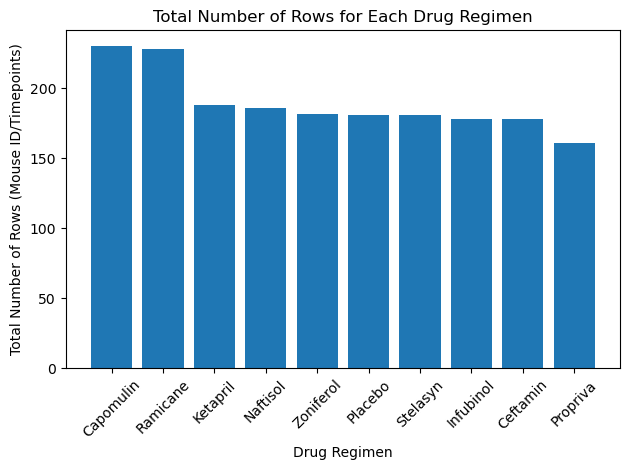

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

import pandas as pd
import matplotlib.pyplot as plt

counts = data_df["Drug Regimen"].value_counts() 
plt.bar(counts.index.values, counts.values)

# Assign labels
plt.title("Total Number of Rows for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Rows (Mouse ID/Timepoints)")
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()

# Show the plot
plt.show()


#plt.plot(kind="bar", color="blue", rot=0)


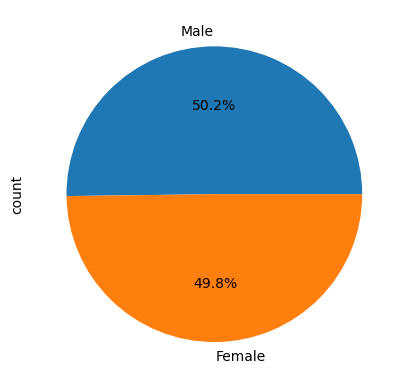

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
genders = data_df.loc[:,["Mouse ID", "Sex"]].drop_duplicates()
# Get the unique mice with their gender
counts = genders.Sex.value_counts()

counts.plot(kind="pie", autopct="%1.1f%%")
plt.show()

# Make the pie chart


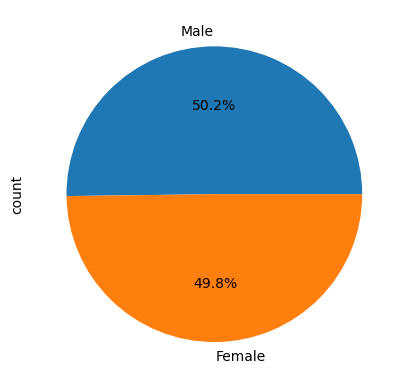

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
genders = data_df.loc[:,["Mouse ID", "Sex"]].drop_duplicates()
counts = genders.Sex.value_counts()

plt.pie(counts.values, labels= counts.index.values, autopct="%1.1f%%")

plt.ylabel("count")
plt.show()
# Get the unique mice with their gender


# Make the pie chart


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
tumor_volume = data_df.groupby(["Mouse ID"])["Timepoint"].max()
tumor_volume= tumor_volume.reset_index()
merged_data = tumor_volume.merge(data_df, on=["Mouse ID", "Timepoint"], how="left")
merged_data
                                 
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
# Assuming 'data_df' is your main DataFrame containing the data
# Example DataFrame structure (replace this with your actual DataFrame)
data = {
    'Mouse ID': ['a203', 'a251', 'a262', 'a275', 'a366', 'z435', 'z578', 'z581', 'z795', 'z969'],
    'Timepoint': [45, 45, 45, 45, 30, 10, 45, 45, 45, 45],
    'Drug Regimen': ['Infubinol', 'Infubinol', 'Placebo', 'Ceftamin', 'Stelasyn', 'Propriva', 'Ramicane', 'Infubinol', 'Naftisol', 'Naftisol'],
    'Sex': ['Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Male', 'Female', 'Female', 'Male'],
    'Age_months': [20, 21, 17, 20, 16, 12, 11, 24, 13, 9],
    'Weight (g)': [23, 25, 29, 28, 29, 26, 16, 25, 29, 30],
    'Tumor Volume (mm3)': [67.973419, 65.525743, 70.717621, 62.999356, 63.440686, 48.710661, 30.638696, 62.754451, 65.741070, 73.867845],
    'Metastatic Sites': [2, 1, 4, 3, 1, 0, 0, 3, 3, 4]
}

# Create the DataFrame
data_df = pd.DataFrame(data)

# Get unique drug regimens
treatment_list = data_df['Drug Regimen'].unique()  
tumor_volume_list = []

# Create a list to store outlier information
outlier_info_list = []

# Loop through each treatment
for treatment in treatment_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = data_df.loc[data_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add subset to the tumor_volume_list
    tumor_volume_list.append(tumor_volumes)

    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = tumor_volumes.quantile(0.25)
    Q3 = tumor_volumes.quantile(0.75)
    IQR = Q3 - Q1
    
    # Determine outliers using upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    # Store outlier information in the list
    outlier_info_list.append({
        'Drug': treatment,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outliers': outliers.tolist()
    })

# Create a DataFrame from the outlier information list
outlier_info = pd.DataFrame(outlier_info_list)

# Display the outlier information
print(outlier_info)



# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers.


    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset


    # Determine outliers using upper and lower bounds


        Drug  Lower Bound  Upper Bound Outliers
0  Infubinol    60.225871    70.663807       []
1    Placebo    70.717621    70.717621       []
2   Ceftamin    62.999356    62.999356       []
3   Stelasyn    63.440686    63.440686       []
4   Propriva    48.710661    48.710661       []
5   Ramicane    30.638696    30.638696       []
6   Naftisol    61.677682    77.931233       []


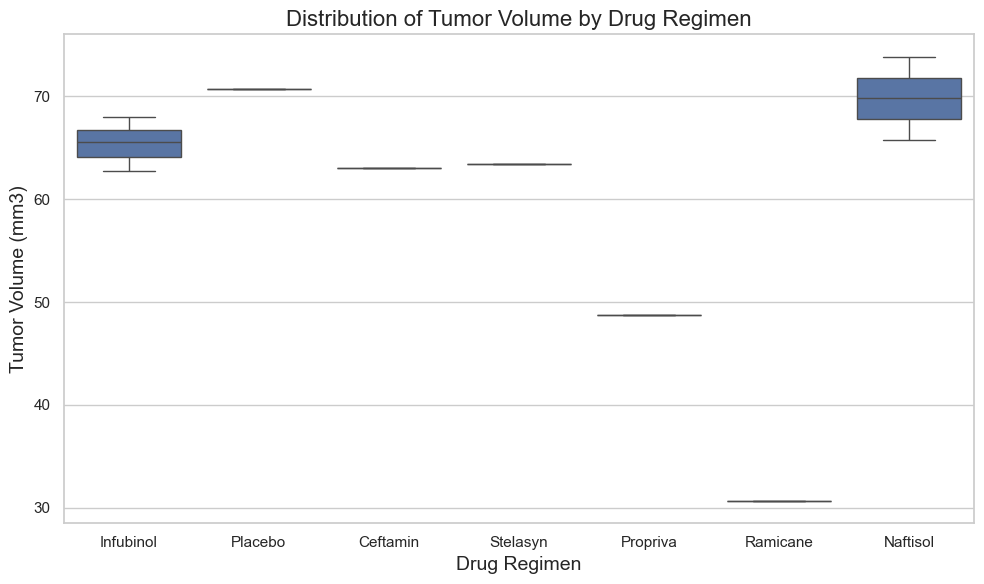

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
# Set the visual style
sns.set(style="whitegrid")

# Create the box plot
plt.figure(figsize=(10, 6))  # Set the size of the plot
sns.boxplot(x='Drug Regimen', y='Tumor Volume (mm3)', data=data_df)

# Add titles and labels
plt.title('Distribution of Tumor Volume by Drug Regimen', fontsize=16)
plt.xlabel('Drug Regimen', fontsize=14)
plt.ylabel('Tumor Volume (mm3)', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()



## Line and Scatter Plots

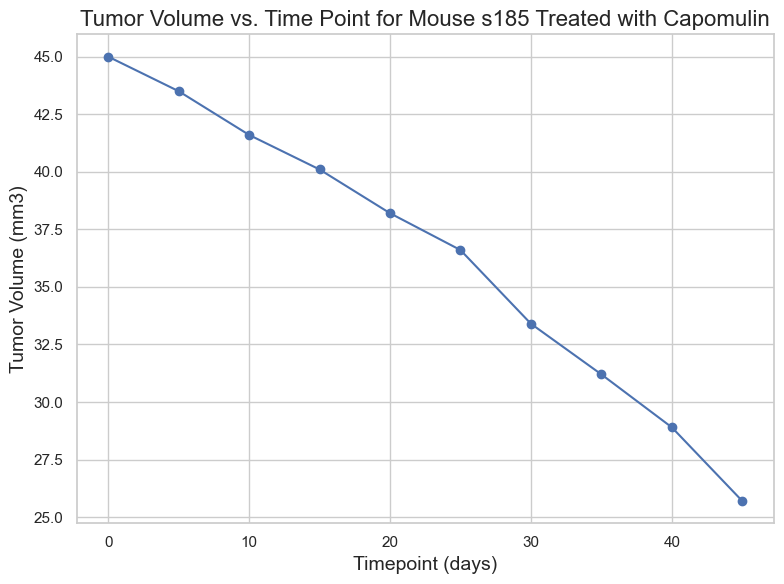

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Example dataset (replace this with your actual dataset)
data = {
    'Mouse ID': ['s185', 's185', 's185', 's185', 's185', 's185', 's185', 's185', 's185', 's185'],
    'Timepoint': [0, 5, 10, 15, 20, 25, 30, 35, 40, 45],
    'Drug Regimen': ['Capomulin']*10,
    'Tumor Volume (mm3)': [45, 43.5, 41.6, 40.1, 38.2, 36.6, 33.4, 31.2, 28.9, 25.7],
}

# Create the DataFrame
data_df = pd.DataFrame(data)

# Select data for a single mouse treated with Capomulin (for this example: 's185')
mouse_data = data_df.loc[(data_df['Drug Regimen'] == 'Capomulin') & (data_df['Mouse ID'] == 's185')]

# Set the visual style
sns.set(style="whitegrid")

# Create the line plot
plt.figure(figsize=(8, 6))  # Set the size of the plot
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o')

# Add titles and labels
plt.title('Tumor Volume vs. Time Point for Mouse s185 Treated with Capomulin', fontsize=16)
plt.xlabel('Timepoint (days)', fontsize=14)
plt.ylabel('Tumor Volume (mm3)', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


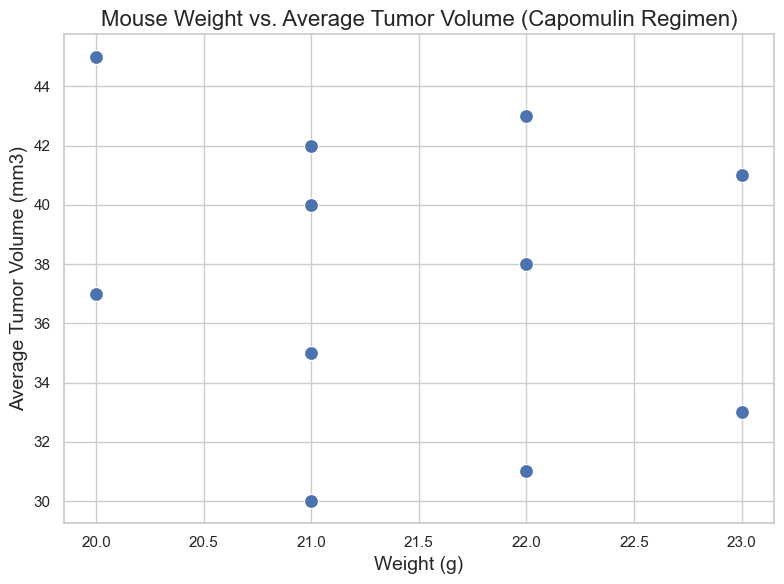

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Example dataset (replace this with your actual dataset)
data = {
    'Mouse ID': ['s185', 'x401', 'm601', 'r554', 'r157', 'b742', 'y793', 't564', 'i738', 'w914', 'g288'],
    'Weight (g)': [20, 22, 21, 23, 21, 22, 20, 21, 23, 22, 21],
    'Drug Regimen': ['Capomulin'] * 11,
    'Tumor Volume (mm3)': [45, 43, 42, 41, 40, 38, 37, 35, 33, 31, 30],
    'Timepoint': [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
}

# Create the DataFrame
data_df = pd.DataFrame(data)

# Filter the data for the Capomulin regimen
capomulin_data = data_df[data_df['Drug Regimen'] == 'Capomulin']

# Group by Mouse ID and calculate the average tumor volume for each mouse
average_tumor_vol = capomulin_data.groupby('Mouse ID').agg({
    'Tumor Volume (mm3)': 'mean',
    'Weight (g)': 'first'  # Use 'first' to get the consistent weight per mouse
}).reset_index()

# Set the visual style
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Weight (g)', y='Tumor Volume (mm3)', data=average_tumor_vol, s=100)

# Add titles and labels
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)', fontsize=16)
plt.xlabel('Weight (g)', fontsize=14)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


## Correlation and Regression

Correlation coefficient: -0.21


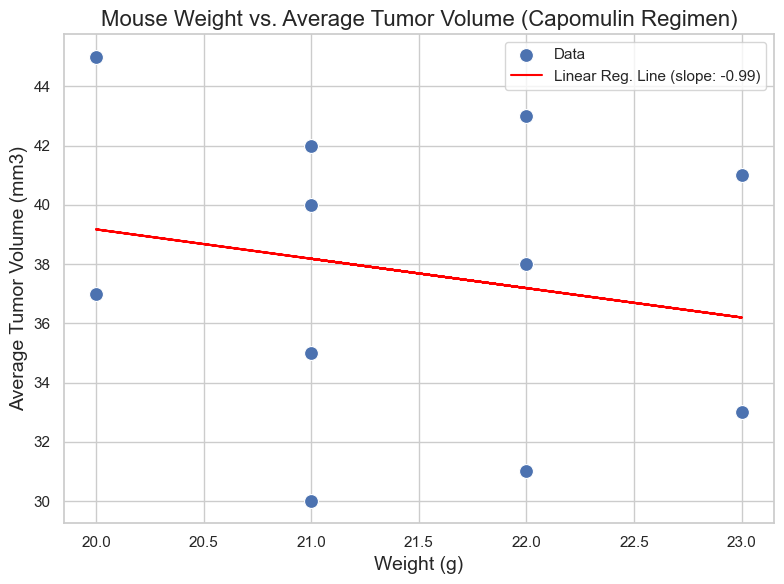

Slope: -0.99
Intercept: 59.00
R-squared: 0.04
P-value: 0.54476
Standard error: 1.58


In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Example dataset (replace with your actual dataset)
data = {
    'Mouse ID': ['s185', 'x401', 'm601', 'r554', 'r157', 'b742', 'y793', 't564', 'i738', 'w914', 'g288'],
    'Weight (g)': [20, 22, 21, 23, 21, 22, 20, 21, 23, 22, 21],
    'Drug Regimen': ['Capomulin'] * 11,
    'Tumor Volume (mm3)': [45, 43, 42, 41, 40, 38, 37, 35, 33, 31, 30],
    'Timepoint': [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
}

# Create the DataFrame
data_df = pd.DataFrame(data)

# Filter the data for the Capomulin regimen
capomulin_data = data_df[data_df['Drug Regimen'] == 'Capomulin']

# Group by Mouse ID and calculate the average tumor volume for each mouse
average_tumor_vol = capomulin_data.groupby('Mouse ID').agg({
    'Tumor Volume (mm3)': 'mean',
    'Weight (g)': 'first'  # Use 'first' to get the consistent weight per mouse
}).reset_index()

# Calculate the correlation coefficient
correlation = average_tumor_vol['Weight (g)'].corr(average_tumor_vol['Tumor Volume (mm3)'])
print(f"Correlation coefficient: {correlation:.2f}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(average_tumor_vol['Weight (g)'], average_tumor_vol['Tumor Volume (mm3)'])

# Create a function to calculate the regression line
regress_values = average_tumor_vol['Weight (g)'] * slope + intercept

# Plot the scatter plot with the regression line
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Weight (g)', y='Tumor Volume (mm3)', data=average_tumor_vol, s=100, label='Data')

# Plot the regression line
plt.plot(average_tumor_vol['Weight (g)'], regress_values, color='red', label=f'Linear Reg. Line (slope: {slope:.2f})')

# Add titles and labels
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)', fontsize=16)
plt.xlabel('Weight (g)', fontsize=14)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=14)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Print linear regression details
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared: {r_value**2:.2f}")
print(f"P-value: {p_value:.5f}")
print(f"Standard error: {std_err:.2f}")
